In [5]:
import timeit
import numpy as np
from timeit import Timer

# Create list

In [9]:
import ray
import time

# Start Ray.
#ray.init()

@ray.remote
def f(x):
    time.sleep(1)
    return x

# Start 4 tasks in parallel.
def test_1():
    result_ids = []
    for i in range(4):
        result_ids.append(f.remote(i))

# Wait for the tasks to complete and retrieve the results.
# With at least 4 cores, this will take 1 second.
results = ray.get(result_ids)  # [0, 1, 2, 3]

expSize = 100

t = Timer("test_1()", "from __main__ import test_1")
st = t.timeit(number=expSize)
print("list range ",st, "milliseconds")

list range  0.15586492500005988 milliseconds


In [10]:
results

[0, 1, 2, 3]

In [7]:
#concat
def test1():
    l = []
    for i in range(10000):
        l = l + [i]

#append
def test2():
    l = []
    #Add a new element with append
    for i in range(10000):
        l.append(i)

#comprehension
def test3():
    #Use bracket that contains elements
    l = [i for i in range(10000)]
    
#list range
def test4():
    #Use list method
    l = list(range(10000))
    
expSize = 100
    
t1 = Timer("test1()", "from __main__ import test1")
st1 = t1.timeit(number=expSize)
print("concat ",st1, "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=expSize), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("comprehension ",t3.timeit(number=expSize), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
st4 = t4.timeit(number=expSize)
print("list range ",st4, "milliseconds")

print ('\n Worse vs. best ratio', st1/st4, '\n')

concat  51.529789014000016 milliseconds
append  0.25409345499974734 milliseconds
comprehension  0.13832575100013855 milliseconds
list range  0.07142862399996375 milliseconds

 Worse vs. best ratio 721.4165152338112 



# Pop-front vs Pop-end


In [3]:
#Pop the first element of a list
pop_zero = Timer("x.pop(0)",
                'from __main__ import x')

#Pop the last element of a list
pop_end = Timer('x.pop()',
                'from __main__ import x')

#Number of experiments
expSize = 100
result = []

for i in range(10000,1000001,20000):
    
    #Define the array
    x = list(range(i))
    
    #Time the average results of 1000 experiments for each method
    pt = pop_end.timeit(number=expSize)
    pz = pop_zero.timeit(number=expSize)
    
    result.append((i,pz,pt))

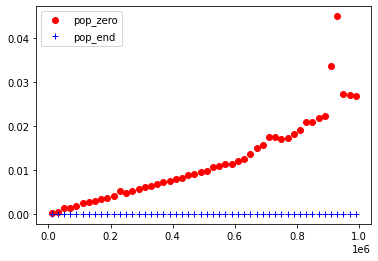

In [4]:
import numpy as np
import matplotlib.pyplot as plt

matrixDat = np.array( result )
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='pop_zero');
plt.plot(matrixDat[:,0], matrixDat[:,2], '+', color='blue',label='pop_end');
leg = plt.legend(numpoints=1)

# List vs Set

In [5]:
import random
result = []

expSize = 1000

for i in range(10000,1000001,20000):
  
    t = timeit.Timer("random.randrange(%d) in x"%i,
        "from __main__ import random,x")
    
    x = list(range(i))
    lst_time = t.timeit(number=expSize)
    
    x = {j:None for j in range(i)}
    d_time = t.timeit(number=expSize)
    
    result.append((i, lst_time, d_time))

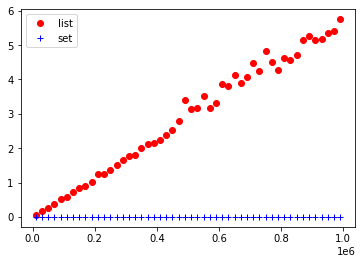

In [7]:
matrixDat = np.array( result )
plt.plot(matrixDat[:,0], matrixDat[:,1], 'o', color='red',label='list');
plt.plot(matrixDat[:,0], matrixDat[:,2], '+', color='blue',label='set');
leg = plt.legend(numpoints=1)